In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
from numpy import pi
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
from time import time

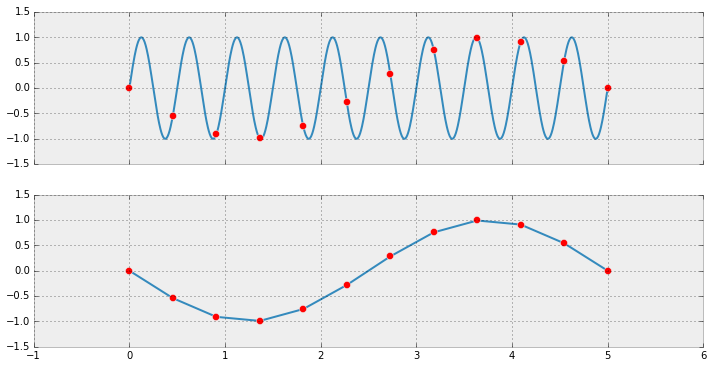

In [17]:
## Critical sampling

# Define a simple sine function
def f(x):
    return np.sin(2 * 2*pi*x)


# Create two subfigures, with same scale on x and y axes
fig, ax = plt.subplots(nrows = 2, figsize = (12, 6), sharey = True, sharex = True)

# Vector to plot the function in high resolution
x0 = np.linspace(0, 5, 1000)
# Vector to define the "sampling points"
x1 = np.linspace(0, 5, 12)

# Plot the function, with sampling points marked
ax[0].plot(x0, f(x0), zorder = 0)
ax[0].scatter(x1, f(x1), marker = 'o', c = 'r', s = 50, zorder = 1)

# Plot the function that results from just using the sampling points.
# By sampling at too large intervals, we get aliasing.
ax[1].plot(x1, f(x1), zorder = 0)
ax[1].scatter(x1, f(x1), marker = 'o', c = 'r', s = 50, zorder = 1)

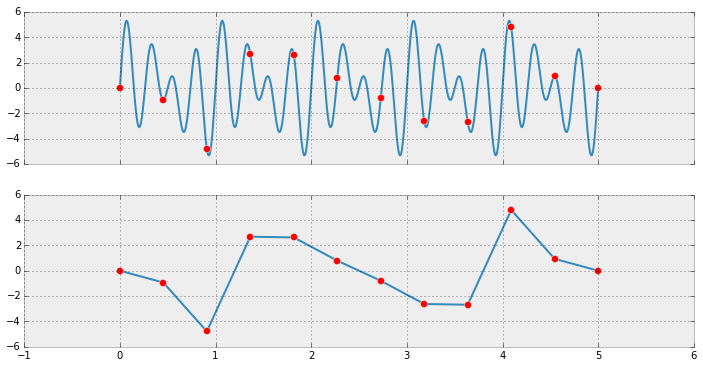

In [19]:
## Critical sampling

# Define a simple sine function
def f(x):
    return 1*np.sin(1 * 2*pi*x) + 2*np.sin(3 * 2*pi*x) + 3*np.sin(4 * 2*pi*x)

# Create two subfigures, with same scale on x and y axes
fig, ax = plt.subplots(nrows = 2, figsize = (12, 6), sharey = True, sharex = True)

# Vector to plot the function in high resolution
x0 = np.linspace(0, 5, 1000)
# Vector to define the "sampling points"
x1 = np.linspace(0, 5, 12)

# Plot the function, with sampling points marked
ax[0].plot(x0, f(x0), zorder = 0)
ax[0].scatter(x1, f(x1), marker = 'o', c = 'r', s = 50, zorder = 1)

# Plot the function that results from just using the sampling points.
# By sampling at too large intervals, we get aliasing.
ax[1].plot(x1, f(x1), zorder = 0)
ax[1].scatter(x1, f(x1), marker = 'o', c = 'r', s = 50, zorder = 1)

/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-6.0, 8.0)

/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


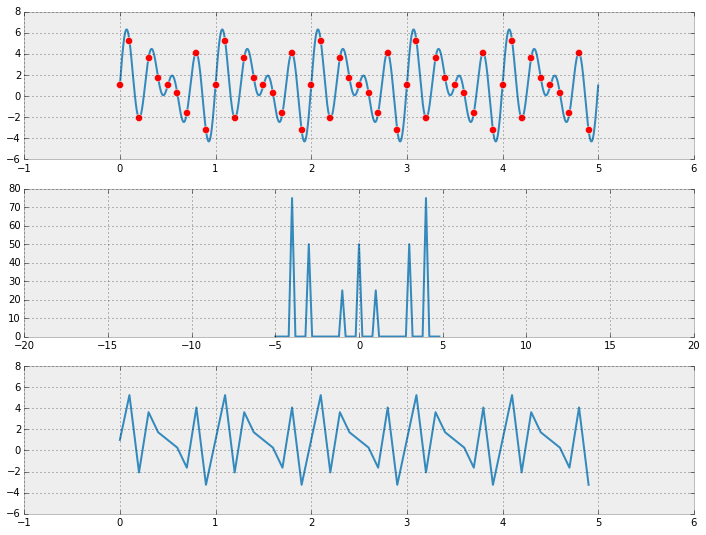

In [13]:
## Critical sampling

# Define a simple sine function
def f(x):
    return 1 + np.sin(1 * 2*pi*x) + 2*np.sin(3 * 2*pi*x) + 3*np.sin(4 * 2*pi*x)

# Create three subplots
fig, ax = plt.subplots(nrows = 3, figsize = (12, 9))

# High resolution x for plotting
N0 = 10000
x0 = np.linspace(0, 5, N0)

# fs is the sampling frequency
fs = 10
dx = 1.0/fs
x1 = np.arange(0, 5, dx)
N1 = len(x1)

# Plot the actual signal, with sampling points
ax[0].plot(x0, f(x0), zorder = 0)
ax[0].scatter(x1, f(x1), marker = 'o', c = 'r', s = 50, zorder = 1)

# Calculate the frequencies resolved by the Fourier transform
# of the sampled data
delta = x1[1] - x1[0]
freqs = np.arange(-N1/2, N1/2, 1) / (N1*delta)

# Plot the fourier transform
ax[1].plot(freqs, np.abs(np.fft.fftshift(np.fft.fft(f(x1)))))
ax[1].set_xlim(-20, 20)

# Plot the inverse Fourier transform. If the sampling frequency
# is larger than twice the highest frequency in the signal, the
# inverse Fourier transfom should reproduce the signal.
ax[2].plot(x1, np.fft.ifft(np.fft.fft(f(x1))))
ax[2].set_xlim(ax[0].get_xlim())
ax[2].set_ylim(ax[0].get_ylim())

## Autocorrelation

This is an example of how autocorrelations can be calculated using the Fourier Transform.

In [40]:
## autocorrelation

# This function generates a random signal with a
# Gaussian power spectrum given by mu and sigma.
# Larger sigma means higher frequency components,
# and consequently shorter correlation length.
def generator(Nx, mu=0.0, sigma=0.1):
    # Gaussian, uncorrelated random numbers of zero mean and unity std. dev.
    real_base = np.random.normal(0, 1, Nx)

    # Transforming to fourier space, shifting
    # to get zero component (purely real) in center
    cmpx_base = np.fft.fftshift(np.fft.fft(real_base))

    # Multiplying with square root of power spectrum
    qs = np.linspace(-10, 10, Nx)
    weights = np.exp(-(qs - mu)**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))
    fourier_zetas = cmpx_base*np.sqrt(weights)
    
    # Shifting and transforming
    return np.fft.ifft(np.fft.ifftshift(fourier_zetas)).real


# Naïve implementation of normalised autocorrelation
def autocorrelate(f):
    Nf = len(f)
    correlations = []
    tmpf = np.zeros(3*Nf)
    offset = int(len(tmpf)/3)
    tmpf[offset:offset+Nf] = f[:] - np.mean(f)
    for lag in range(offset-Nf, offset+Nf):
        correlations.append(np.sum(f * tmpf[lag:lag+Nf]))
    return np.array(correlations) / correlations[int(len(correlations)/2)]


# Normalised autocorrelation by multiplying FFT with the conjugate of itself
def autocorrelate_fft(f):
    Nf = len(f)
    tmpf = np.zeros(2*Nf)
    offset = int(len(tmpf)/4)
    tmpf[offset:offset+Nf] = f[:] - np.mean(f)
    fftf = np.fft.fft(tmpf)
    correlations = np.fft.fftshift(np.fft.ifft(fftf * fftf.conjugate()))
    return correlations / correlations[int(len(correlations)/2)]
    

0.236462491679


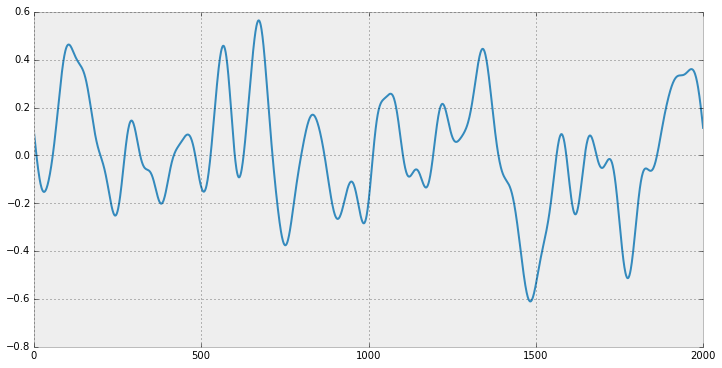

In [50]:
# Generate a signal and plot it
N = 2000
f = generator(N, sigma = 0.1)
fig = plt.figure(figsize = (12, 6))
plt.plot(f)

Time:           0.05999588966369629
Time with FFT:  0.0011029243469238281


/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


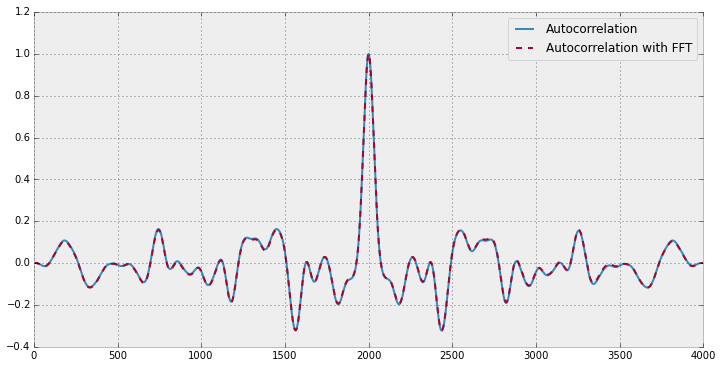

In [52]:
# Calculate autocorrelations using both methods,
# find the time it takes, and plot both in the same figure
fig = plt.figure(figsize = (12, 6))
tic = time()
c = autocorrelate(f)
toc = time()
print('Time:          ', toc - tic)
plt.plot(c, label = 'Autocorrelation')
tic = time()
c = autocorrelate_fft(f)
toc = time()
print('Time with FFT: ', toc - tic)
plt.plot(c, '--', label = 'Autocorrelation with FFT')
plt.legend()

## Image compression with Fourier transform

This type of compression would normally be done with Wavelet transforms, but the principle is the same with a Fourier transform.

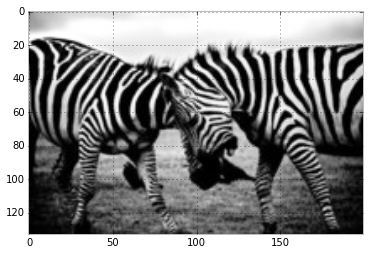

In [2]:
from scipy.misc import imread

# The picture has a Creative Commons Licence,
# and is taken from http://picalls.com/fighting-zebras/
zebras = imread('zebras.jpg')
plt.imshow(zebras, cmap = plt.get_cmap('Greys_r'))

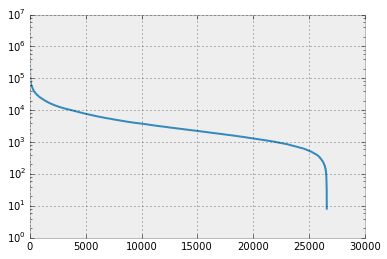

In [53]:
# Take Fourier transform, and plot the coefficients,
# from largest to smallest. A small fraction of the
# coefficients make up most of the "energy" in the picture.
zebras_fft = np.fft.fft2(zebras[:,:])
coefficients = sorted(abs(zebras_fft.reshape(133*200)))
plt.plot(coefficients[::-1])
plt.yscale('log')

Number of zero elements: 22843 of 26600


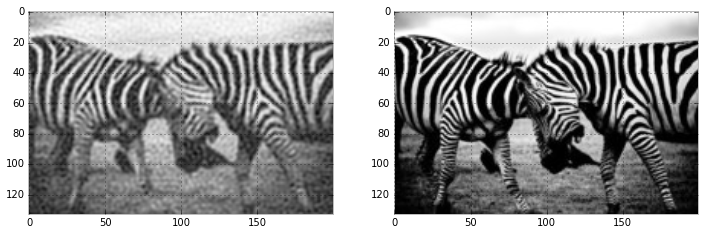

In [54]:
# Select a threshold, and set all the coefficients smaller
# than the threshold to zero.
threshold = 10000
zebras_fft_compressed = np.where(abs(zebras_fft) > threshold, zebras_fft, 0)

# Do the inverse Fourier transform on the ``compressed'' data,
# the plot both the original and the reconstruction.
zebras_compressed = np.fft.ifft2(zebras_fft_compressed)

fig, ax = plt.subplots(ncols = 2, figsize = (12, 4))
ax[0].imshow(zebras_compressed.real, cmap = plt.get_cmap('Greys_r'))
ax[1].imshow(zebras, cmap = plt.get_cmap('Greys_r'))

print('Number of zero elements: %s of %s' % (np.sum(abs(zebras_fft_compressed) == 0), zebras.size))